In [1]:
from __future__ import division

import socket
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import pandas as pd
import pdb
import pickle

In [2]:
material_names=["Adhesive","Brick","Cardboard","Ceramic","Cloth","Concrete","Cotton","Diamond","Glass","Leather","Marble","Metal","Paper","Plastic","Porcelain","Rubber","Stone","Styrofoam","Wax","Wood","Wool"]

In [3]:
material_data = pd.read_csv("/home/hasan/Documents/reos/oroc_2.0/data/material_data.csv").values


In [4]:

material_data=material_data[:,1:]

In [5]:
# Some initializations
network_dimensions = np.array([10, 10])
n_iterations = 100000
init_learning_rate = 0.01
normalise_data = True

In [6]:
normalise_by_column = False

In [7]:
# establish variables based on data
m = material_data.shape[0]
n = material_data.shape[1]

In [8]:

# initial neighbourhood radius
init_radius = max(network_dimensions[0], network_dimensions[1]) / 2

# radius decay parameter
time_constant = n_iterations / np.log(init_radius)

data = material_data

In [9]:
if normalise_data:
    if normalise_by_column:
        # normalise along each column
        col_maxes = material_data.max(axis=0)
        data = material_data / col_maxes[np.newaxis, :]
    else:
        # normalise entire dataset
        data = material_data / data.max()

In [10]:
#serialize data
pickle.dump(data, open("material_data.p", "wb"))

In [11]:
# setup random weights between 0 and 1
# weight matrix needs to be one m-dimensional vector for each neuron in the SOM
net = np.random.random((network_dimensions[0], network_dimensions[1], m))


In [12]:
def find_bmu(t, net, m):
    """
        Find the best matching unit for a given vector, t, in the SOM
        Returns: a (bmu, bmu_idx) tuple where bmu is the high-dimensional BMU
                 and bmu_idx is the index of this vector in the SOM
    """
    bmu_idx = np.array([0, 0])
    # set the initial minimum distance to a huge number
    min_dist = np.iinfo(np.int).max    
    # calculate the high-dimensional distance between each neuron and the input
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            # don't bother with actual Euclidean distance, to avoid expensive sqrt operation
            sq_dist = np.sum((w - t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    # get vector corresponding to bmu_idx
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    # return the (bmu, bmu_idx) tuple
    return (bmu, bmu_idx)

In [13]:

def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

Iteration: 10
Graph for 5*5 size SOM
Iteration: 50
Graph for 5*5 size SOM
Iteration: 100
Graph for 5*5 size SOM
Iteration: 150
Graph for 5*5 size SOM
Iteration: 200
Graph for 5*5 size SOM
Iteration: 500
Graph for 5*5 size SOM
Iteration: 1000
Graph for 5*5 size SOM
Iteration: 5000
Graph for 5*5 size SOM
Iteration: 10000
Graph for 5*5 size SOM
Iteration: 15000
Graph for 5*5 size SOM
Iteration: 20000
Graph for 5*5 size SOM
Iteration: 25000
Graph for 5*5 size SOM
Iteration: 50000
Graph for 5*5 size SOM
Iteration: 99999
Graph for 5*5 size SOM


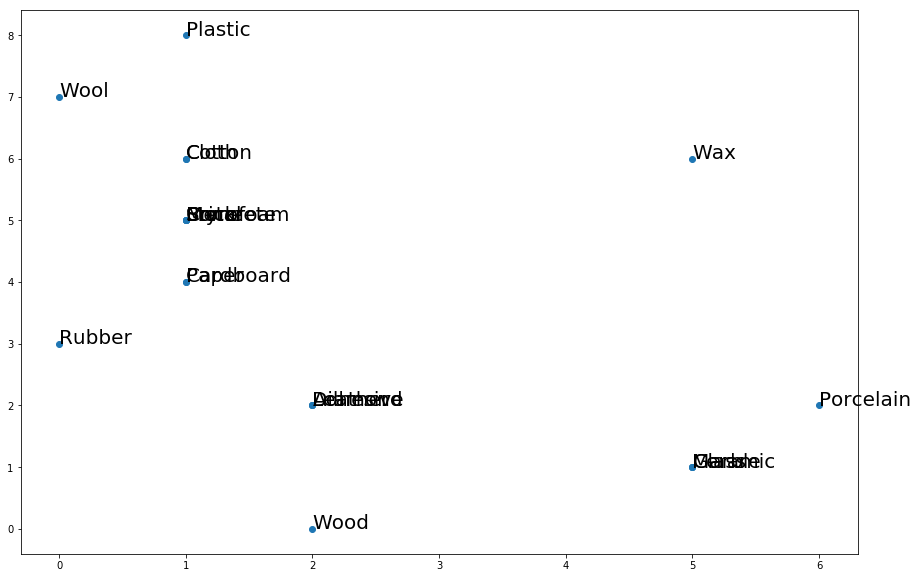

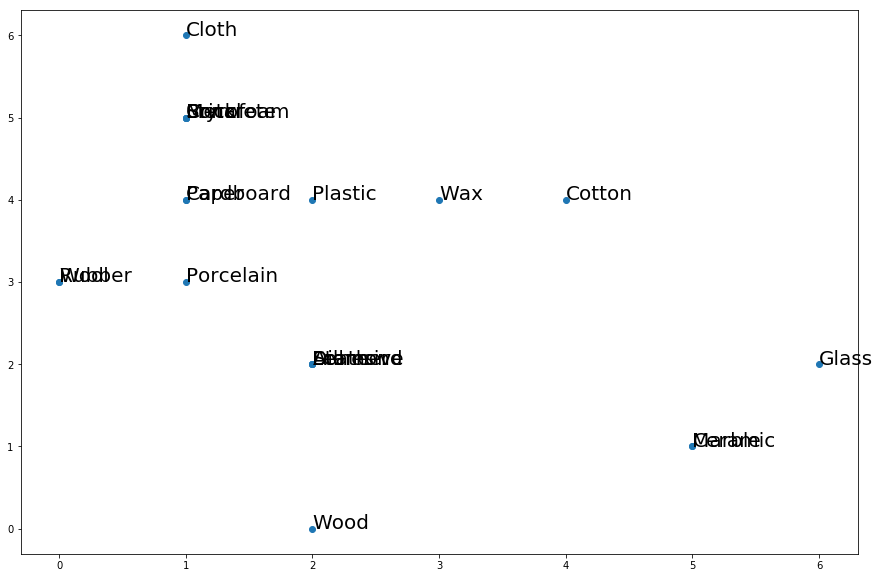

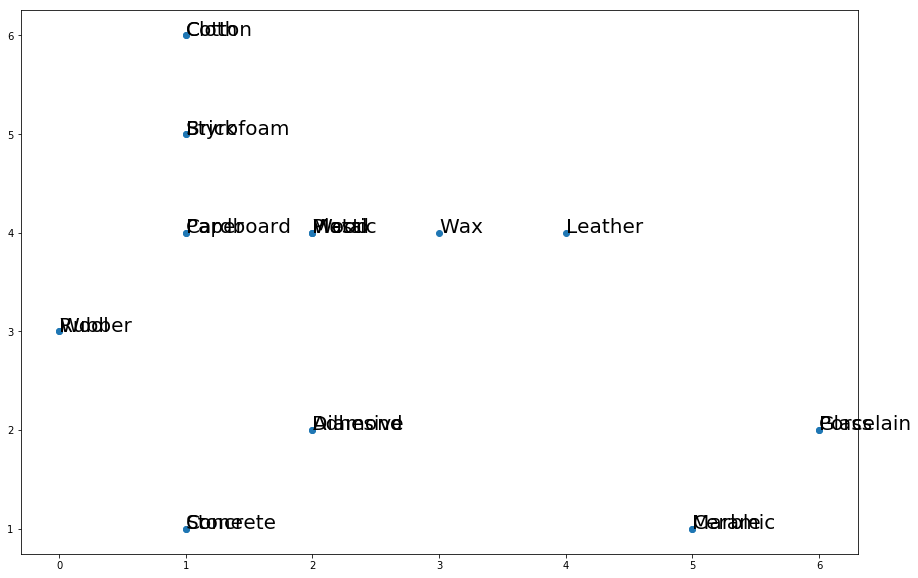

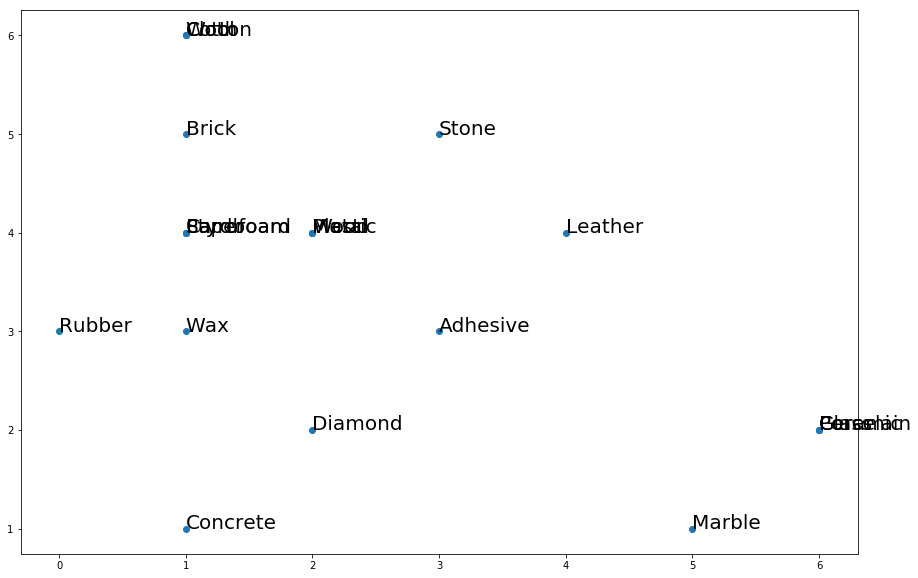

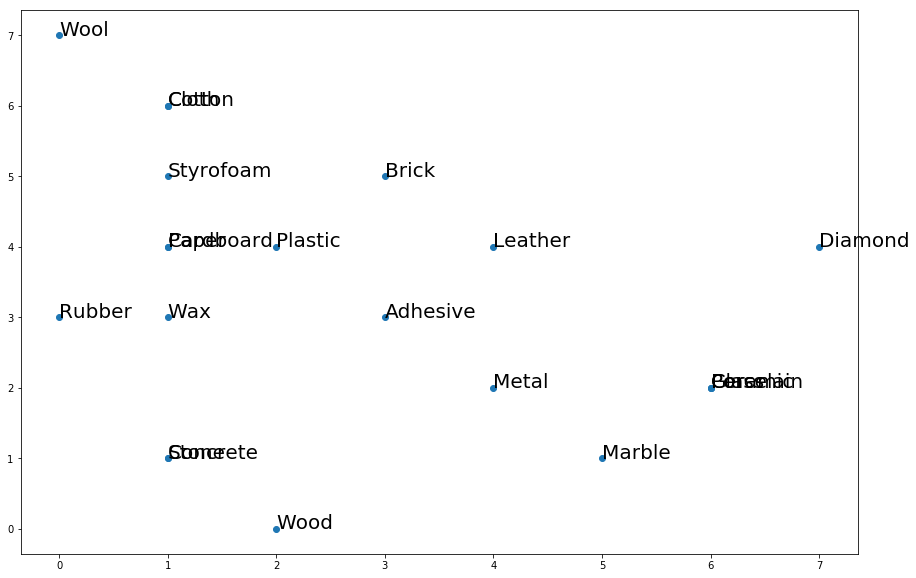

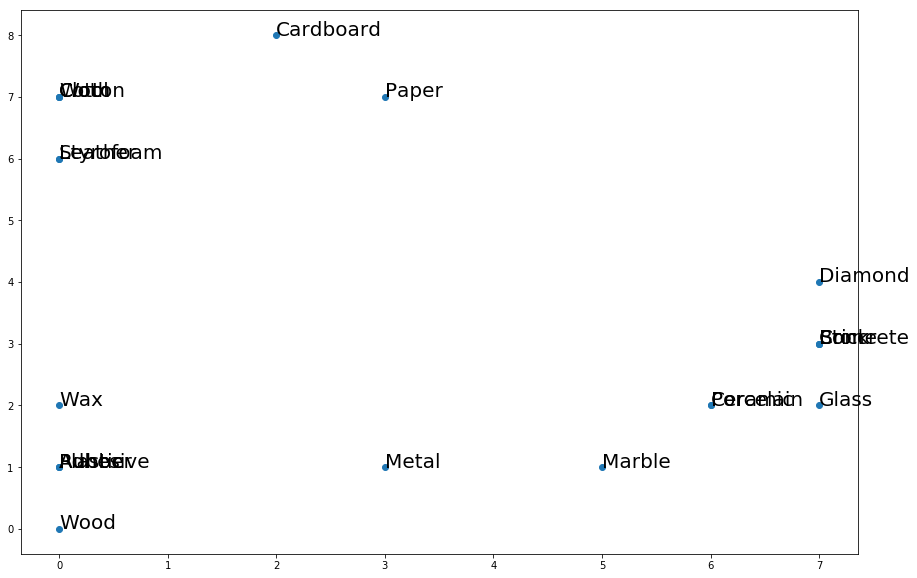

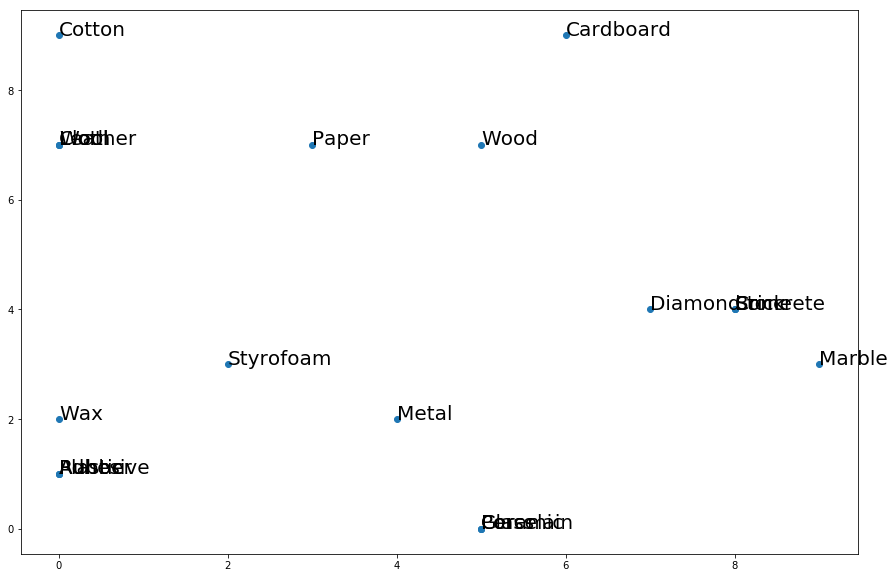

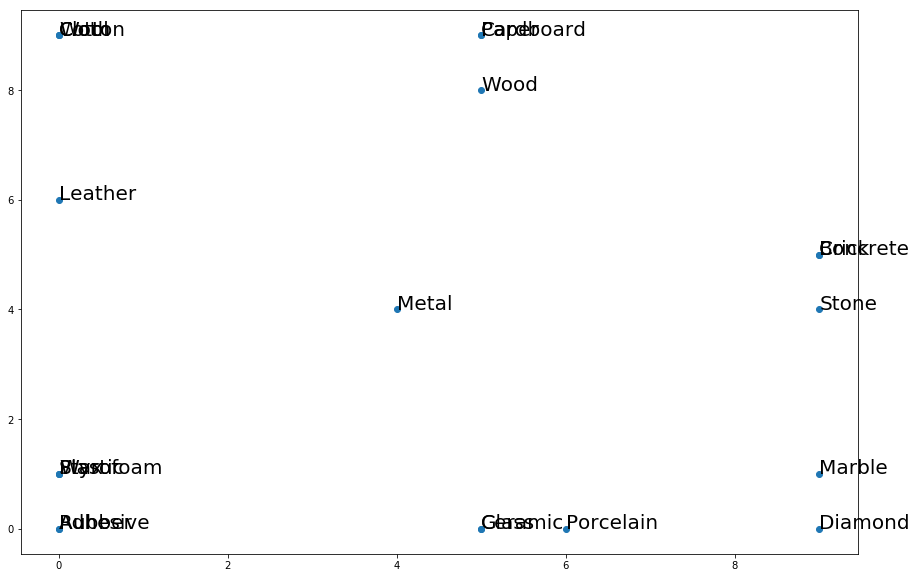

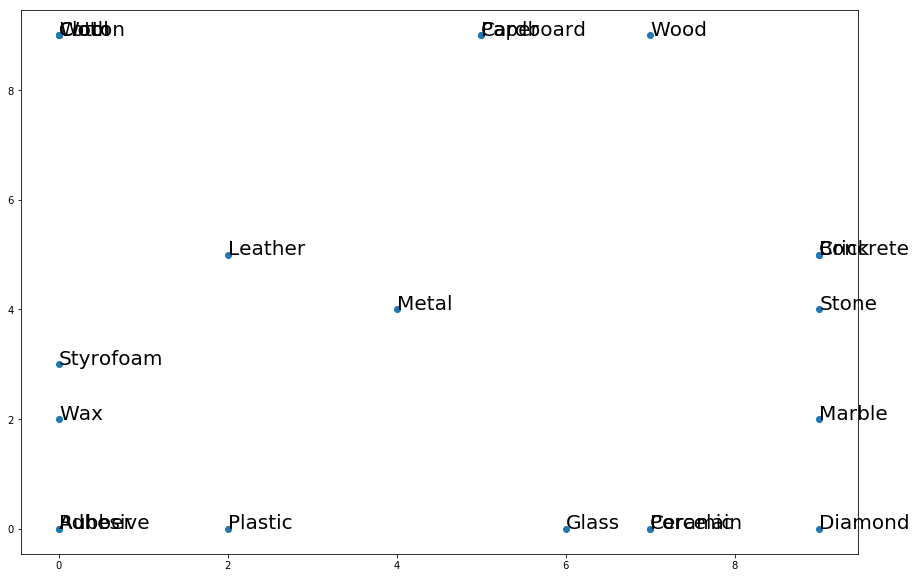

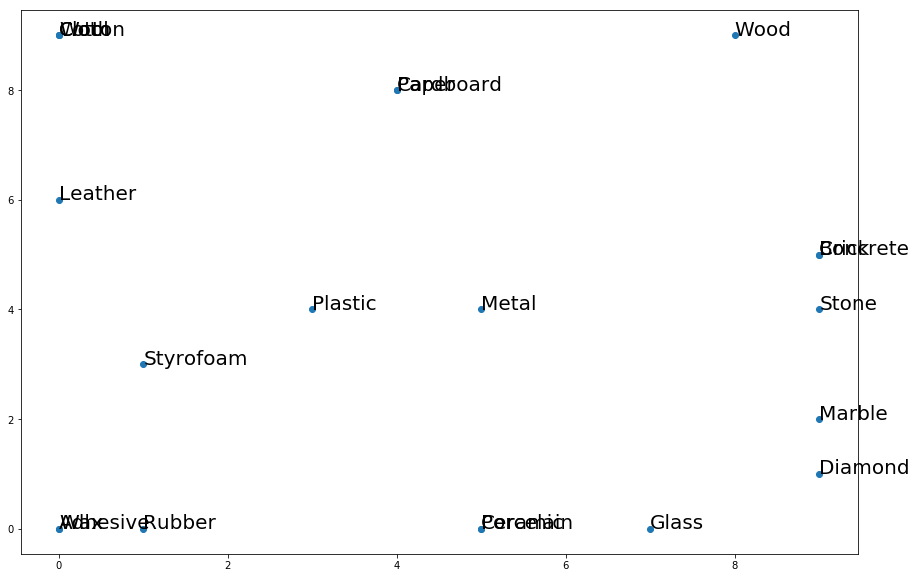

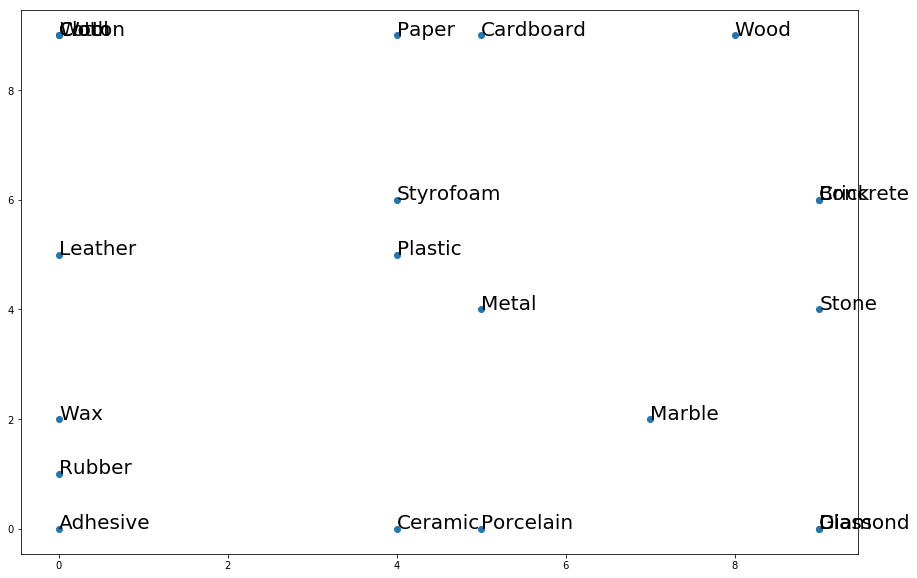

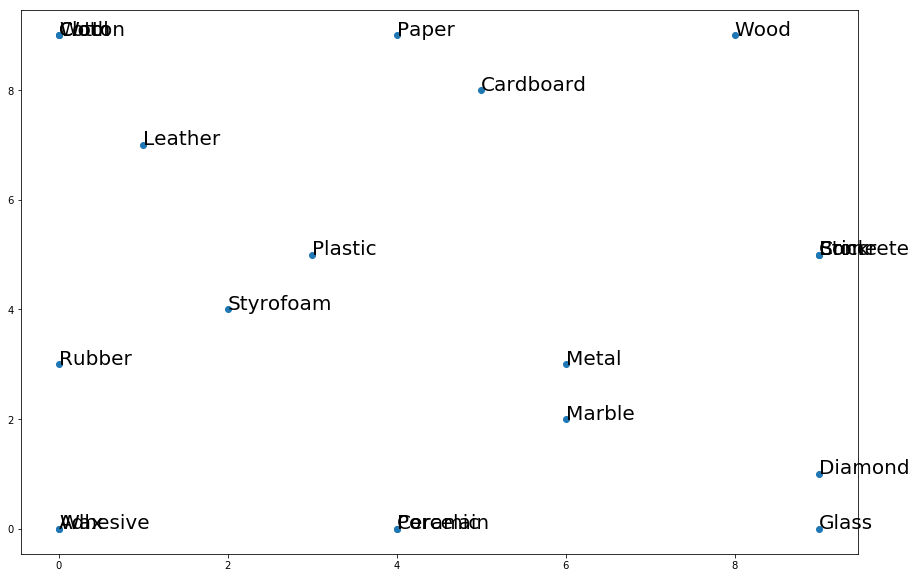

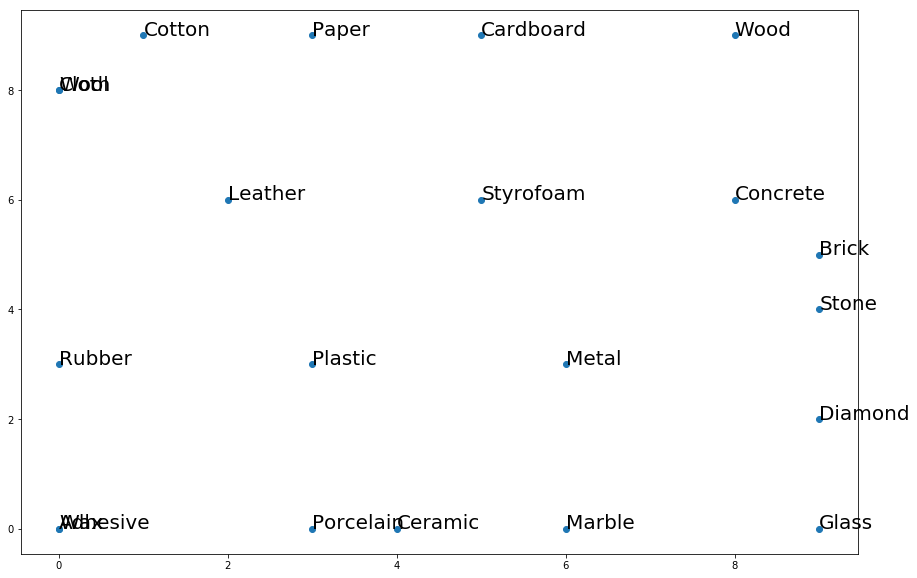

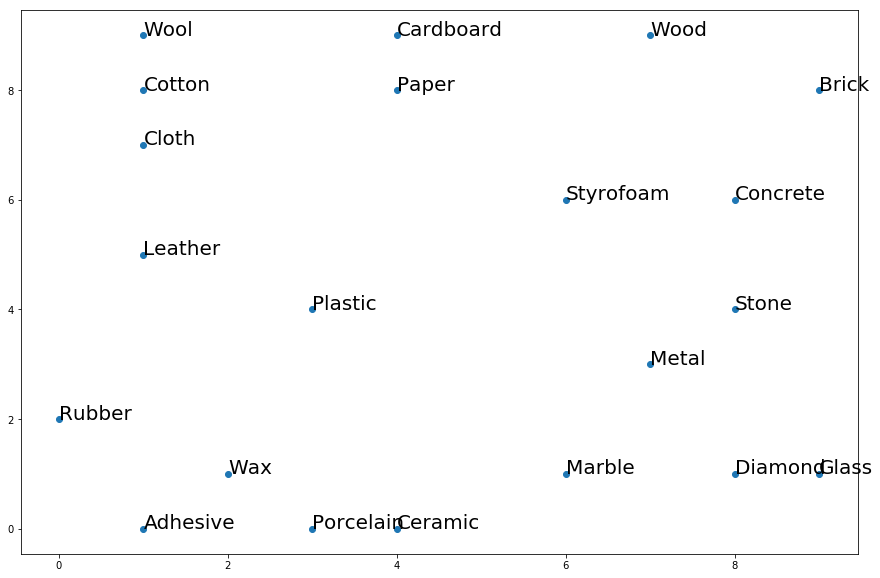

In [16]:
for i in range(n_iterations):
    # select a training example at random
    t = data[np.random.randint(0, n),:].reshape(np.array([m, 1]))
    
    # find its Best Matching Unit
    bmu, bmu_idx = find_bmu(t, net, m)

    # decay the SOM parameters
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)
    
    # now we know the BMU, update its weight vector to move closer to input
    # and move its neighbours in 2-D space closer
    # by a factor proportional to their 2-D distance from the BMU
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            # get the 2-D distance (again, not the actual Euclidean distance)
            w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
            # if the distance is within the current neighbourhood radius
            if w_dist <= r**2:
                # calculate the degree of influence (based on the 2-D distance)
                influence = calculate_influence(w_dist, r)
                # now update the neuron's weight using the formula:
                # new w = old w + (learning rate * influence * delta)
                # where delta = input vector (t) - old w
                new_w = w + (l * influence * (t - w))
                # commit the new weight
                net[x, y, :] = new_w.reshape(1, 21)
    #print("Iteration:",i)
                
    
    if(i==10):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==50):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==100):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==150):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==200):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==500):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==1000):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==5000):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==10000):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==15000):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==20000):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==25000):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==50000):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
    elif(i==99999):
        print("Iteration:",i)
        
        
        material_idx = {}
        group = np.zeros(21)
# List of x coordinate of index
        list1 = []
# List of y coordinate of index
        list2 =[]
        for i in range(21):
            
            t = data[:, i].reshape(np.array([m, 1]))
            bmu, bmu_idx = find_bmu(t, net, m)
            bmu_idx = tuple(bmu_idx)
            if bmu_idx in material_idx:
                material_idx[bmu_idx].append(material_names[i])
            else:
                tempList = []
                tempList.append(material_names[i])
                material_idx[bmu_idx] = tempList
            #print(i, material_names[i], bmu_idx)
            group[i]=bmu_idx[0]
            list1.append(bmu_idx[0])
            list2.append(bmu_idx[1])
        #print(material_idx)
        visualization()
        

        
            
        

In [ ]:
material_idx = {}
group = np.zeros(21)
# List of x coordinate of index
list1 = []
# List of y coordinate of index
list2 =[]
for i in range(21):
    t = data[:, i].reshape(np.array([m, 1]))
    bmu, bmu_idx = find_bmu(t, net, m)
    bmu_idx = tuple(bmu_idx)
    if bmu_idx in material_idx:
        material_idx[bmu_idx].append(material_names[i])
    else:
        tempList = []
        tempList.append(material_names[i])
        material_idx[bmu_idx] = tempList
    print(i, material_names[i], bmu_idx)
    group[i]=bmu_idx[0]
    list1.append(bmu_idx[0])
    list2.append(bmu_idx[1])
print(material_idx)


In [ ]:
def savTolist():
    
    # Dictionary with key - index in the weight matrix, Value - material
    # Ex - {(0,3): 'Adhesive', (9,4): 'Brick',...}
    material_idx = {}
    group = np.zeros(21)
    # List of x coordinate of index
    list1 = []
    # List of y coordinate of index
    list2 =[]
    for i in range(21):
        t = data[i,:].reshape(np.array([m, 1]))
        
        bmu, bmu_idx = find_bmu(t, net, m)
        bmu_idx = tuple(bmu_idx)
        if bmu_idx in material_idx:
            material_idx[bmu_idx].append(material_names[i])
        else:
            tempList = []
            tempList.append(material_names[i])
            material_idx[bmu_idx] = tempList
        #print(i, material_names[i], bmu_idx)
        group[i]=bmu_idx[0]
        list1.append(bmu_idx[0])
        list2.append(bmu_idx[1])
    print(material_idx)
    visualization()
    


In [ ]:
savTolist()

In [14]:
# ---GRAPHICAL VISUALIZATIONS ---
def visualization():
    print("Graph for 5*5 size SOM")
    f = plt.figure(figsize=(15,10))
    ax = f.subplots()
    ax.scatter(list1, list2)
    for i, txt in enumerate(material_names):
        ax.annotate(txt, (list1[i], list2[i]), size=20)

In [15]:
def saveWeigths():
    
    
# Serialize weight matrix - net and dictionary - material_idx 
    pickle.dump(net, open( "material_weights.p", "wb" ) )
    pickle.dump(material_idx, open( "material_idx.p", "wb" ) )